# Contribution of stratospheric origin ozone to surface ozone extreme events at North America

In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import pooch
import cartopy.crs as ccrs
import cartopy
plt.rcParams['figure.figsize'] = (12,6)

## Data

The ozone and the stratospheric origin ozone data used for this project are from CAMS Reanalysis data by ECMWF. It is 3 hourly data with 0.75X0.75 spatial resolution at surface level (lowest model level) only. The North America here is restriced to 150W to 90W for longitude and 0 to 60N for the latitude.

In [2]:
doi = "doi:10.5281/zenodo.5759104"

known_hashs = ["md5:5b953683ae0ada902290a7629f719df5","md5:d334e73cefb4294a66eb637fc94fe1cd"]
shorts = ["O3","O3S"]
for i in range(2):
    fname = "CAMSRA_"+shorts[i]+"_NA.nc"
    file_path = pooch.retrieve(
        url=f"{doi}/{fname}",
        known_hash=known_hashs[i],
    )
    if i == 0:
        ds = xr.open_dataset(file_path)
    else:
        temp = xr.open_dataset(file_path)
        ds = xr.merge([ds, temp])
del temp
ds

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 81, time: 52600)
Coordinates:
  * longitude  (longitude) float32 210.0 210.8 211.5 212.2 ... 298.5 299.2 300.0
  * latitude   (latitude) float32 60.0 59.25 58.5 57.75 ... 2.25 1.5 0.75 0.0
  * time       (time) datetime64[ns] 2003-01-01 ... 2020-12-31T21:00:00
Data variables:
    go3        (time, latitude, longitude) float32 ...
    o3s        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-12-04 22:18:37 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

Since these two variables have unit of mass mixing ratio(kgkg^-1), we need to convert into volume mixing ratio(ppbv: molmol^-1)

In [3]:
ds = 28.9644 / 47.9982 * 1e9 *ds

Let us first examine the structure of data by displaying composite and timeseries of mean value over the region

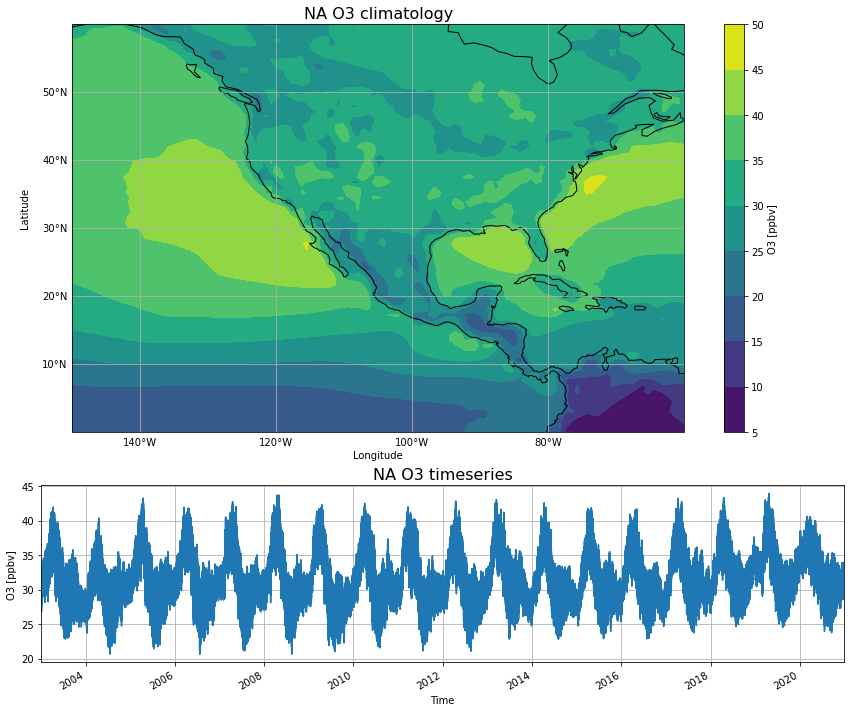

In [4]:
x, y = np.meshgrid(ds.longitude,ds.latitude)
extent = [-150,-60,0,60]
fig = plt.figure(figsize=(12,10))

ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,ds.go3.mean('time'))
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('O3 [ppbv]')
ax1.set_title('NA O3 climatology',fontsize=16)

ax2 = plt.subplot(313)
ds.go3.mean(['latitude','longitude']).plot()
plt.ylabel('O3 [ppbv]')
plt.xlabel('Time')
plt.title('NA O3 timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

We could see that peaks at composite are located near both coast. Generally, ocean has higher ozone concentration than land at the same latitude. Also, lower latitude has lower ozone concentration typically. From a timeseries, 

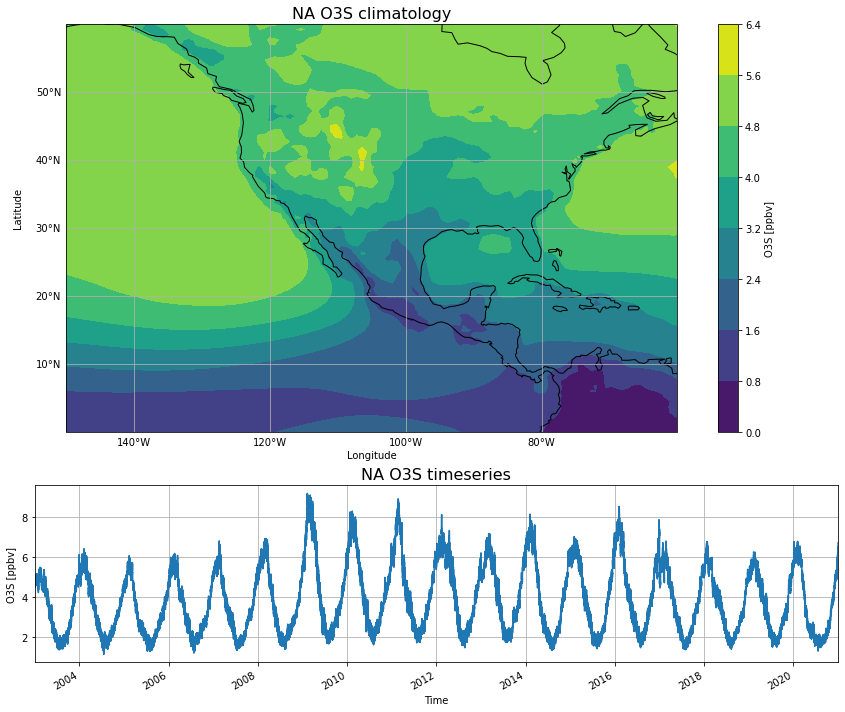

In [5]:
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,ds.o3s.mean('time'))
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('O3S [ppbv]')
ax1.set_title('NA O3S climatology',fontsize=16)

ax2 = plt.subplot(313)
ds.o3s.mean(['latitude','longitude']).plot()
plt.ylabel('O3S [ppbv]')
plt.xlabel('Time')
ax2.set_title('NA O3S timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

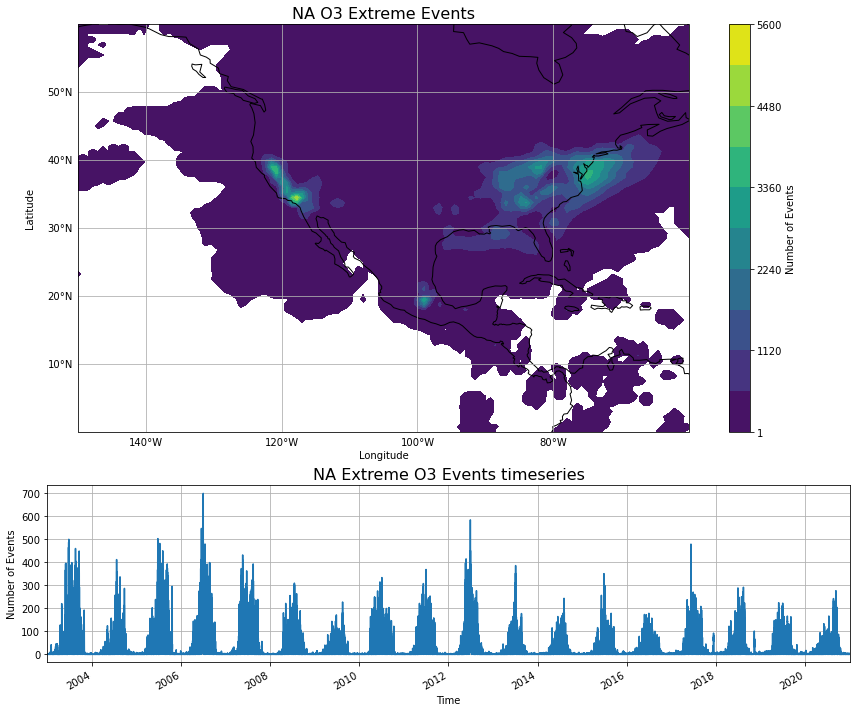

In [6]:
clevel = np.linspace(0,1,11)*5600
clevel[0] = 1
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,(ds.go3>70).sum('time'),levels=clevel)
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('Number of Events')
ax1.set_title('NA O3 Extreme Events',fontsize=16)

ax2 = plt.subplot(313)
(ds.go3>70).sum(['latitude','longitude']).plot()
plt.ylabel('Number of Events')
plt.xlabel('Time')
plt.title('NA Extreme O3 Events timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

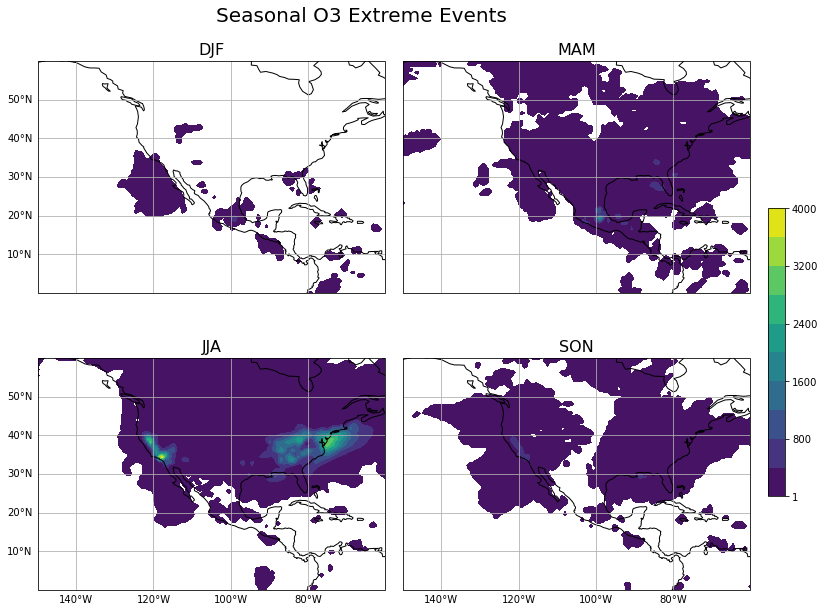

In [7]:
clevel = np.linspace(0,1,11)*4000
clevel[0] = 1
fig, ax= plt.subplots(2,2,figsize=(12,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax[0,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,0].coastlines()
g1 = ax[0,0].gridlines()
g1.left_labels = True
ax[0,0].contourf(x,y,(ds.go3>70).groupby('time.season').sum(dim="time").sel(season='DJF'),levels=clevel)
ax[0,0].set_title('DJF',fontsize=16)

ax[0,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,1].coastlines()
g2 = ax[0,1].gridlines()
ax[0,1].contourf(x,y,(ds.go3>70).groupby('time.season').sum(dim="time").sel(season='MAM'),levels=clevel)
ax[0,1].set_title('MAM',fontsize=16)

ax[1,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,0].coastlines()
g3 = ax[1,0].gridlines()
g3.left_labels = True
g3.bottom_labels = True
c3 = ax[1,0].contourf(x,y,(ds.go3>70).groupby('time.season').sum(dim="time").sel(season='JJA'),levels=clevel)
ax[1,0].set_title('JJA',fontsize=16)

ax[1,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,1].coastlines()
g4 = ax[1,1].gridlines()
g4.bottom_labels = True
ax[1,1].contourf(x,y,(ds.go3>70).groupby('time.season').sum(dim="time").sel(season='SON'),levels=clevel)
ax[1,1].set_title('SON',fontsize=16)

fig.suptitle('Seasonal O3 Extreme Events',fontsize=20)
fig.subplots_adjust(top=0.95,right=0.95,wspace=0.05,hspace=0)
cbar_ax = fig.add_axes([0.97, 0.3, 0.02, 0.4])
fig.colorbar(c3, cax=cbar_ax)

In [8]:
ds_rolling = ds.rolling(time=480,min_periods=1,center=True).mean() #240
ds_anom = ds-ds_rolling
del ds_rolling

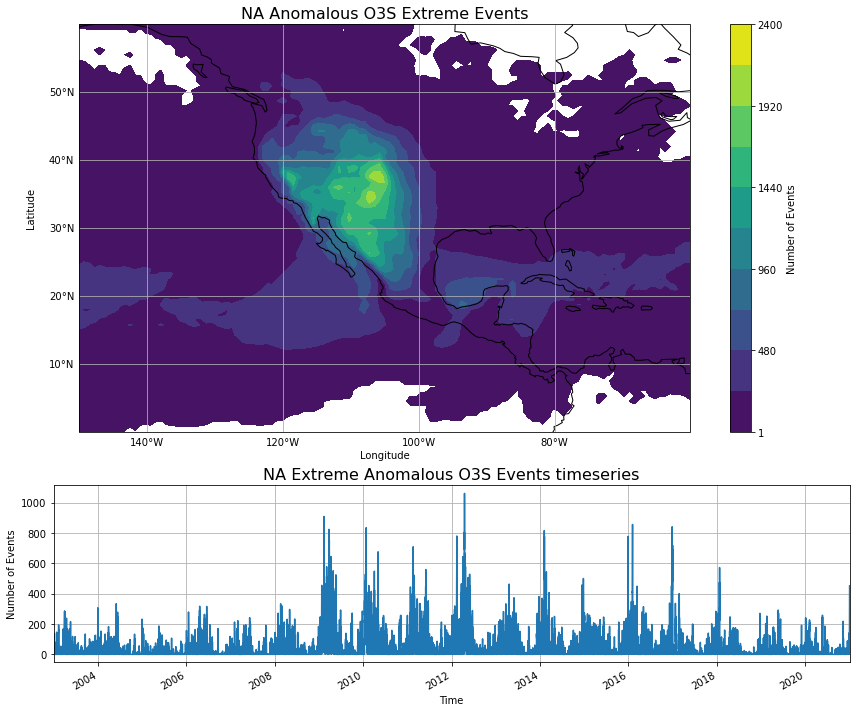

In [9]:
clevel = np.linspace(0,1,11)*2400
clevel[0] = 1
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,(ds_anom.o3s>5).sum('time'),levels=clevel)
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('Number of Events')
ax1.set_title('NA Anomalous O3S Extreme Events',fontsize=16)

ax2 = plt.subplot(313)
(ds_anom.o3s>5).sum(['latitude','longitude']).plot()
plt.ylabel('Number of Events')
plt.xlabel('Time')
plt.title('NA Extreme Anomalous O3S Events timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

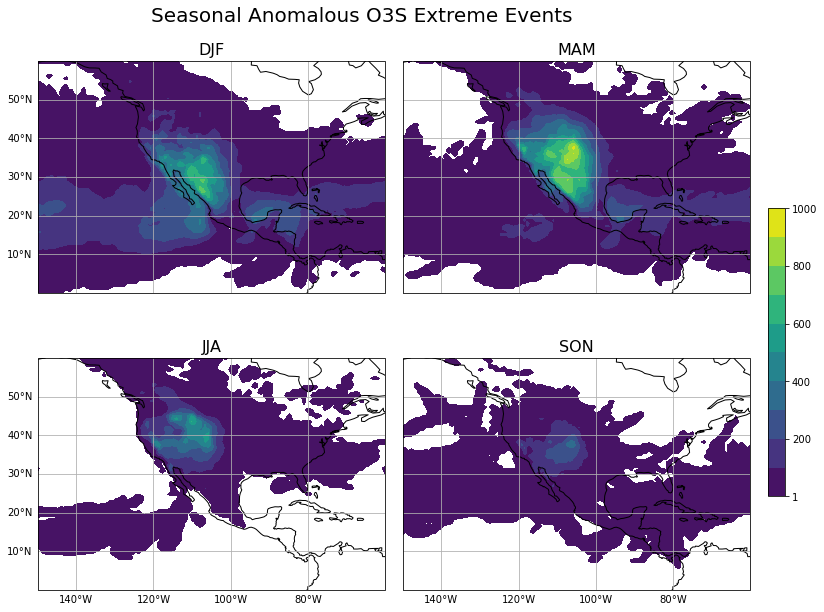

In [10]:
clevel = np.linspace(0,1,11)*1000
clevel[0] = 1
fig, ax= plt.subplots(2,2,figsize=(12,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax[0,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,0].coastlines()
g1 = ax[0,0].gridlines()
g1.left_labels = True
ax[0,0].contourf(x,y,(ds_anom.o3s>5).groupby('time.season').sum(dim="time").sel(season='DJF'),levels=clevel)
ax[0,0].set_title('DJF',fontsize=16)

ax[0,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,1].coastlines()
g2 = ax[0,1].gridlines()
ax[0,1].contourf(x,y,(ds_anom.o3s>5).groupby('time.season').sum(dim="time").sel(season='MAM'),levels=clevel)
ax[0,1].set_title('MAM',fontsize=16)

ax[1,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,0].coastlines()
g3 = ax[1,0].gridlines()
g3.left_labels = True
g3.bottom_labels = True
c3 = ax[1,0].contourf(x,y,(ds_anom.o3s>5).groupby('time.season').sum(dim="time").sel(season='JJA'),levels=clevel)
ax[1,0].set_title('JJA',fontsize=16)

ax[1,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,1].coastlines()
g4 = ax[1,1].gridlines()
g4.bottom_labels = True
ax[1,1].contourf(x,y,(ds_anom.o3s>5).groupby('time.season').sum(dim="time").sel(season='SON'),levels=clevel)
ax[1,1].set_title('SON',fontsize=16)

fig.suptitle('Seasonal Anomalous O3S Extreme Events',fontsize=20)
fig.subplots_adjust(top=0.95,right=0.95,wspace=0.05,hspace=0)
cbar_ax = fig.add_axes([0.97, 0.3, 0.02, 0.4])
fig.colorbar(c3, cax=cbar_ax)

In [11]:
extreme_event = np.array(ds.go3>70)&np.array(ds_anom.o3s>5)
extreme_event = xr.DataArray(extreme_event, name='extreme_event',
                            dims=["time","latitude", "longitude"])
ds_anom = xr.merge([ds_anom,extreme_event])

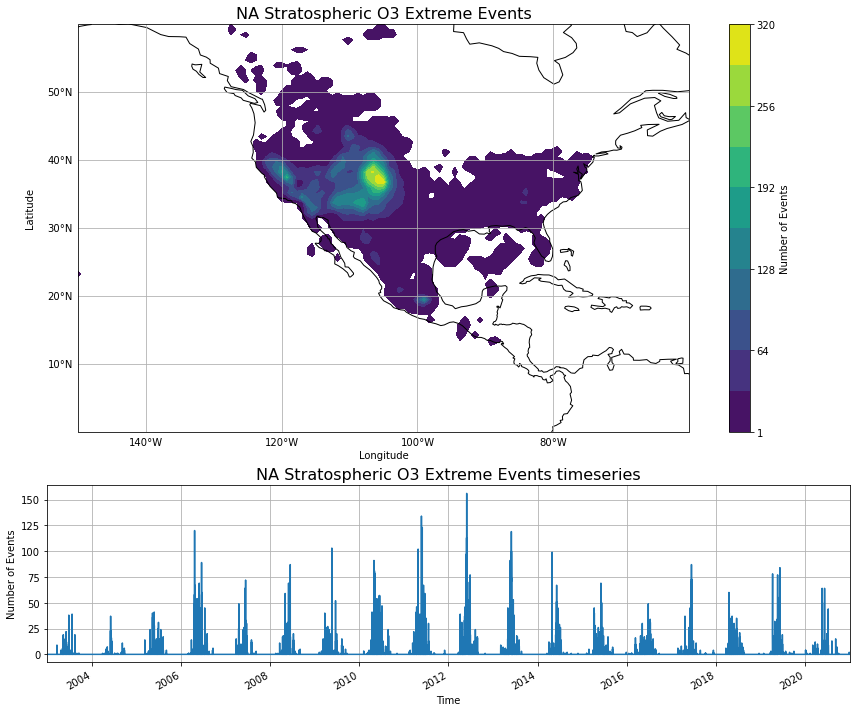

In [12]:
clevel = np.linspace(0,1,11)*320
clevel[0] = 1
fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot(3,1,(1,2),projection=ccrs.PlateCarree())
ax1.set_extent(extent,crs=ccrs.PlateCarree())
ax1.coastlines()
g1 = ax1.gridlines()
g1.left_labels = True
g1.bottom_labels = True
c1 = ax1.contourf(x,y,ds_anom.extreme_event.sum('time'),levels=clevel)
ax1.text(-0.07, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes)
ax1.text(0.5, -0.07, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes)
cbar1 = plt.colorbar(c1)
cbar1.set_label('Number of Events')
ax1.set_title('NA Stratospheric O3 Extreme Events',fontsize=16)

ax2 = plt.subplot(313)
ds_anom.extreme_event.sum(['latitude','longitude']).plot()
plt.ylabel('Number of Events')
plt.xlabel('Time')
plt.title('NA Stratospheric O3 Extreme Events timeseries',fontsize=16)
plt.grid(True)
ax2.set_xlim(pd.Timestamp('2003-01-01'),pd.Timestamp('2021-01-01'))
fig.tight_layout()

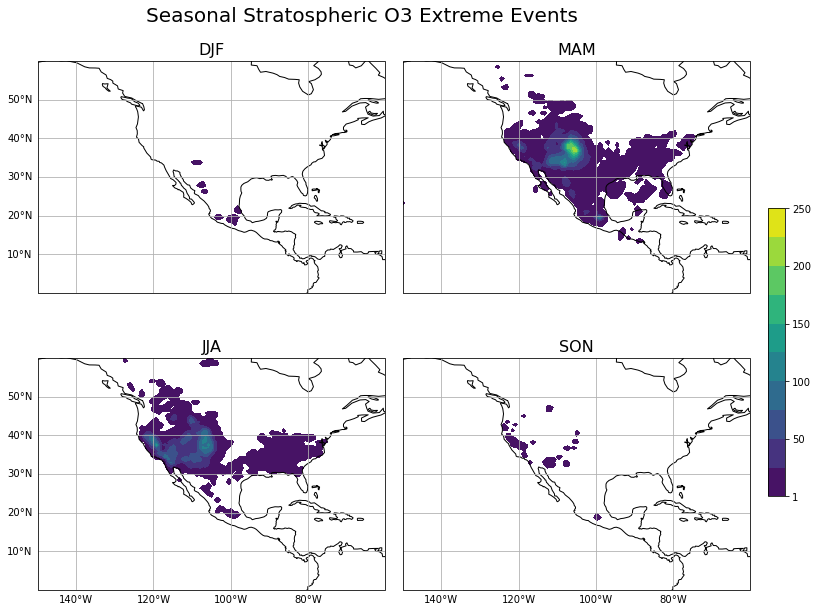

In [13]:
clevel = np.linspace(0,1,11)*250
clevel[0] = 1
fig, ax= plt.subplots(2,2,figsize=(12,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax[0,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,0].coastlines()
g1 = ax[0,0].gridlines()
g1.left_labels = True
ax[0,0].contourf(x,y,ds_anom.extreme_event.groupby('time.season').sum(dim="time").sel(season='DJF'),levels=clevel)
ax[0,0].set_title('DJF',fontsize=16)

ax[0,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[0,1].coastlines()
g2 = ax[0,1].gridlines()
ax[0,1].contourf(x,y,ds_anom.extreme_event.groupby('time.season').sum(dim="time").sel(season='MAM'),levels=clevel)
ax[0,1].set_title('MAM',fontsize=16)

ax[1,0].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,0].coastlines()
g3 = ax[1,0].gridlines()
g3.left_labels = True
g3.bottom_labels = True
c3 = ax[1,0].contourf(x,y,ds_anom.extreme_event.groupby('time.season').sum(dim="time").sel(season='JJA'),levels=clevel)
ax[1,0].set_title('JJA',fontsize=16)

ax[1,1].set_extent(extent,crs=ccrs.PlateCarree())
ax[1,1].coastlines()
g4 = ax[1,1].gridlines()
g4.bottom_labels = True
ax[1,1].contourf(x,y,ds_anom.extreme_event.groupby('time.season').sum(dim="time").sel(season='SON'),levels=clevel)
ax[1,1].set_title('SON',fontsize=16)

fig.suptitle('Seasonal Stratospheric O3 Extreme Events',fontsize=20)
fig.subplots_adjust(top=0.95,right=0.95,wspace=0.05,hspace=0)
cbar_ax = fig.add_axes([0.97, 0.3, 0.02, 0.4])
fig.colorbar(c3, cax=cbar_ax)